In [5]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

tmp1 = 'https://search.naver.com/search.naver?where=kin'

html = tmp1 + '&sm=tab_jum&ie=utf&query={key_word}&start={num}'
response = urlopen(html.format(num=1,key_word=urllib.parse.quote('여친 선물')))
soup = BeautifulSoup(response,'html.parser')
tmp = soup.find_all('dl')
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  여친선물로 뭘 줘야 할까요?   2020.05.21.   여친선물로 뭘 줘야 할까요?   답변 안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이 돌 수 있는 목걸이,반지...    닉네임Shine09749 블로그   ',
 '  질문  아빠가 어제 카드 주셔서 여친 선물   2020.02.04.   아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면...   답변 제가 보기에는 여친이 너무 무리하게 요구하는것 같은데 무리해서도라도 사주고 싶은 건가요? 남친을 곤란하게 만드는 여친이라면 고민해 보셔야할듯 해요~사랑은 둘이...    닉네임후니맘   ',
 '  질문  여우님!! 정품문의 답변즘여 여친선물인데....   2020.01.29.   셀렉온에서 구매했으며 EATTREND에서 물품 배송되었어요. 메종 마르지엘라 5AC 미니백 부탁드립니다. 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다.   답변 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요;    닉네임은빛여우   ',
 '  질문  여친선물!!!!!!   2020.01.29.   여친한테 선물할건데 여친이 친구들한테도 자랑할만한 선물이 있을까요?? 괜찮으면 내공 50개 드리겠습니다ㅜㅜ   답변 화장품 가게에 손잡고 같이가서 마음에 드는걸 사주세요    닉네임친절한 남쌤   ',
 '  질문  베트남에서 여친 선물   2019.08


93500
417



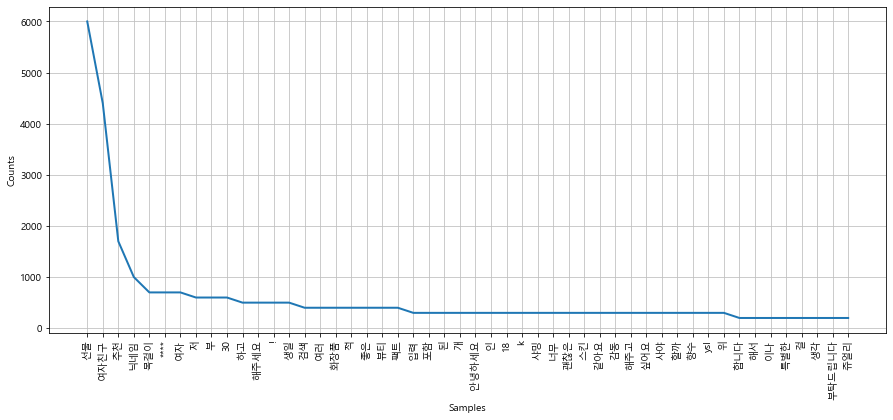

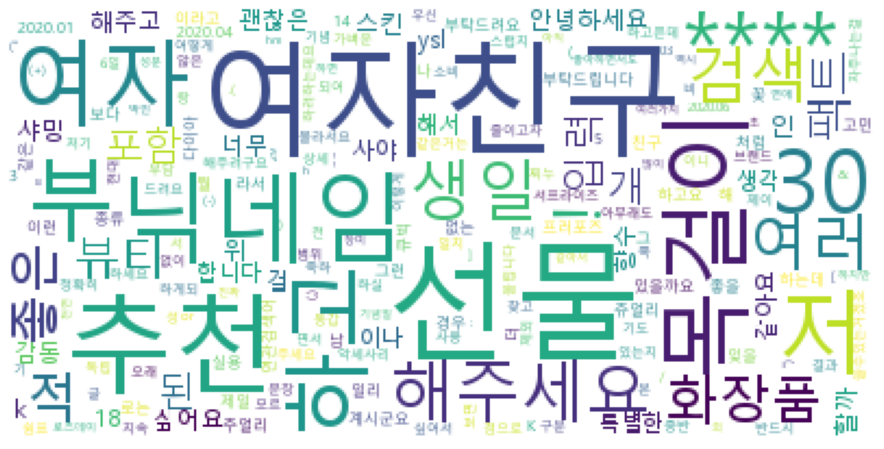

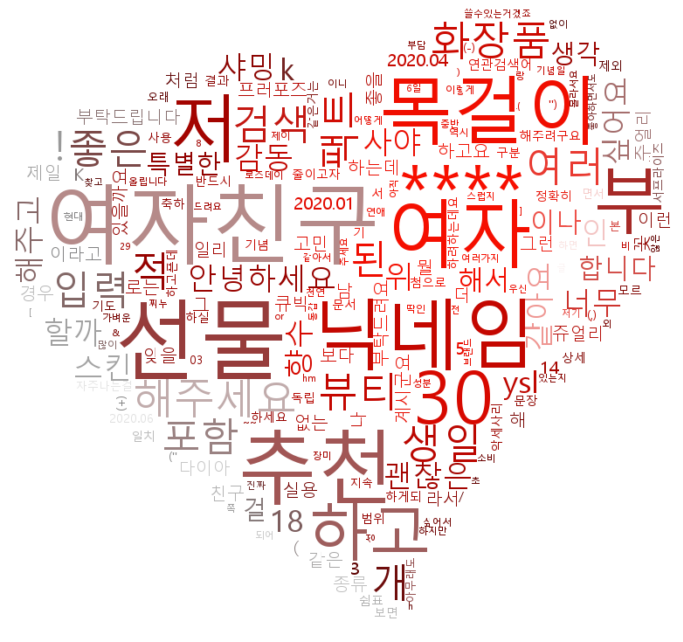

In [8]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

present_candi_text
len(present_candi_text)


import nltk
from konlpy.tag import Twitter; t = Twitter()

present_text = ''
for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'
tokens_ko = t.morphs(present_text)
tokens_ko

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

ko.similar('여자친구')

stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko  if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()


from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



mask = np.array(Image.open('09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)
data = ko.vocab().most_common(200)


wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()